In [36]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv("assessment_da25.csv")

In [38]:
data.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


Next, I add new columns for the defined metrics:

In [39]:
data["CTR"] = data["Clicks on media"] / data["Number of page views"]


In [40]:
data["Conversion rate"] = data["Number of add to cart"] / data["Number of page views"]


In [41]:
data.groupby('Variant')[['Time on Page (sec)', 'CTR', 'Conversion rate']].describe()


Time on Page (sec)                                                  \
                     count    mean        std  min  25%   50%   75%    max   
Variant                                                                      
A                   1000.0  20.543  20.596076  1.0  6.0  13.0  29.0  143.0   
B                   1000.0  20.047  19.319784  1.0  7.0  14.0  28.0  132.0   

           CTR            ...                Conversion rate            \
         count      mean  ...       75%  max           count      mean   
Variant                   ...                                            
A        995.0  0.301462  ...  0.444444  1.0           995.0  0.506522   
B        993.0  0.247124  ...  0.333333  1.0           993.0  0.581260   

                                                           
              std  min       25%       50%       75%  max  
Variant                                                    
A        0.555527  0.0  0.166667  0.333333  0.666667  4.0  
B        0.551898  0.0  0.250000  0.500000  0.750000  5.0  

[2 rows x 24 columns]

I need to filter data for each variant.

In [42]:
variant_a = data[data["Variant"] == "A"]
variant_b = data[data["Variant"] == "B"]


Let's visualise CTR!

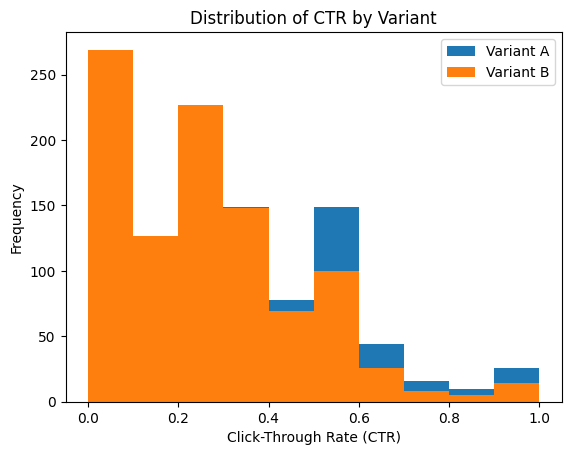

In [45]:
plt.hist(variant_a["CTR"], label="Variant A")
plt.hist(variant_b["CTR"], label="Variant B")
plt.legend()
plt.xlabel("Click-Through Rate (CTR)")
plt.ylabel("Frequency")
plt.title("Distribution of CTR by Variant")
plt.show()

I use Levene's test for homogeneity of variances to determine the appropriate t-test.

In [46]:
levene_statistic, p_value_levene = stats.levene(variant_a["CTR"], variant_b["CTR"])

if p_value_levene < 0.05:
    print("Unequal variances detected. Using Welch's t-test.")
else:
    print("Equal variances assumed. Using ttest_ind.")


Equal variances assumed. Using ttest_ind.


Independent t-test is apt. Let's take care of divide by zeros...

In [47]:
variant_a_filtered = variant_a[variant_a["Number of page views"] > 0]
variant_b_filtered = variant_b[variant_b["Number of page views"] > 0]

variant_a_filtered.loc[:, "CTR"] = variant_a_filtered["Clicks on media"] / variant_a_filtered["Number of page views"]
variant_b_filtered.loc[:, "CTR"] = variant_b_filtered["Clicks on media"] / variant_b_filtered["Number of page views"]

time for t-test!

In [48]:
t_statistic, p_value = stats.ttest_ind(variant_a_filtered["CTR"], variant_b_filtered["CTR"], equal_var=True)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis. Statistically significant difference in CTR between variants.")
else:
    print("Fail to reject null hypothesis. No statistically significant difference in CTR.")


t-statistic: 5.377228087459435
p-value: 8.455180218008184e-08
Reject null hypothesis. Statistically significant difference in CTR between variants.


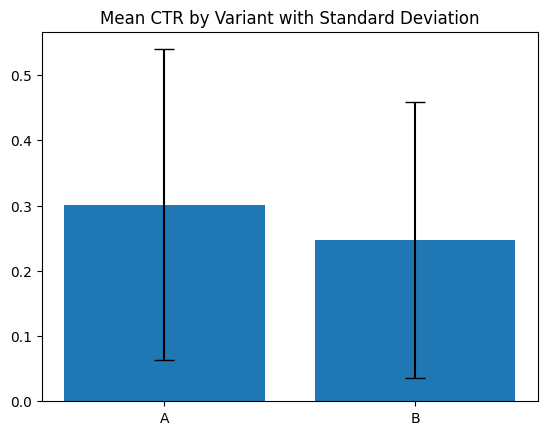

In [72]:
#means
mean_ctr_a = variant_a_filtered['CTR'].mean()
mean_ctr_b = variant_b_filtered['CTR'].mean()

#standard deviations
std_dev_a = variant_a_filtered['CTR'].std()
std_dev_b = variant_b_filtered['CTR'].std()

# % changes
percentage_change = ((mean_ctr_b - mean_ctr_a) / mean_ctr_a) * 100

import matplotlib.pyplot as plt

#plot
variants = ['A', 'B']
ctr_values = [mean_ctr_a, mean_ctr_b]
error_values = [std_dev_a, std_dev_b]  
fig, ax = plt.subplots()
ax.bar(variants, ctr_values, yerr=error_values, capsize=7) 
plt.title('Mean CTR by Variant with Standard Deviation')

plt.show()


Great! let's now move on to the secondary metrics aka conversion rate and time on page. It's time to repeat!

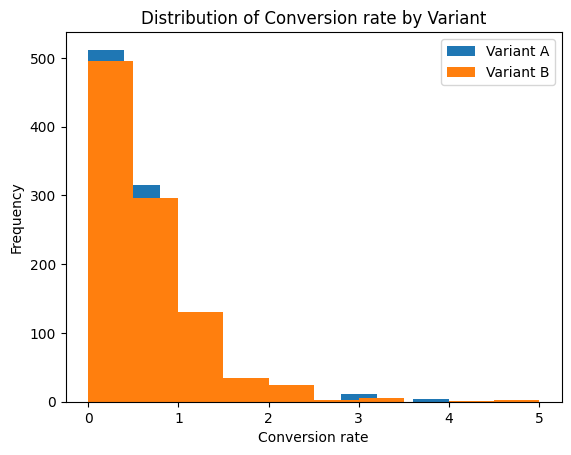

In [50]:
plt.hist(variant_a["Conversion rate"], label="Variant A")
plt.hist(variant_b["Conversion rate"], label="Variant B")
plt.legend()
plt.xlabel("Conversion rate")
plt.ylabel("Frequency")
plt.title("Distribution of Conversion rate by Variant")
plt.show()

In [51]:
levene_statistic, p_value_levene = stats.levene(variant_a["Conversion rate"], variant_b["Conversion rate"])

if p_value_levene < 0.05:
    print("Unequal variances detected. Using Welch's t-test.")
else:
    print("Equal variances assumed. Using ttest_ind.")


Equal variances assumed. Using ttest_ind.


In [52]:
variant_a_filtered = variant_a[variant_a["Number of page views"] > 0]
variant_b_filtered = variant_b[variant_b["Number of page views"] > 0]

variant_a_filtered.loc[:, "Conversion rate"] = variant_a_filtered["Number of add to cart"] / variant_a_filtered["Number of page views"]
variant_b_filtered.loc[:, "Conversion rate"] = variant_b_filtered["Number of add to cart"] / variant_b_filtered["Number of page views"]

In [53]:
t_statistic, p_value = stats.ttest_ind(variant_a_filtered["CTR"], variant_b_filtered["CTR"], equal_var=True)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis. Statistically significant difference in CTR between variants.")
else:
    print("Fail to reject null hypothesis. No statistically significant difference in CTR.")


t-statistic: 5.377228087459435
p-value: 8.455180218008184e-08
Reject null hypothesis. Statistically significant difference in CTR between variants.


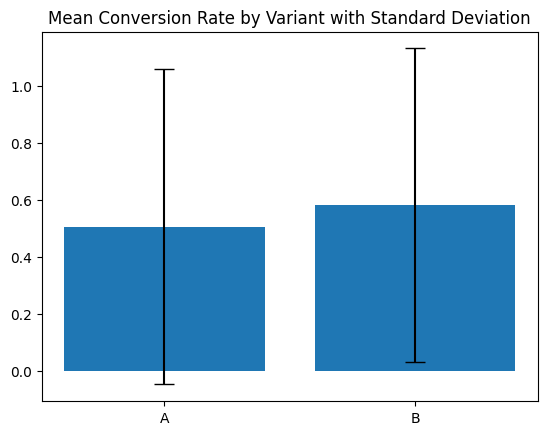

In [71]:
#means
mean_conversion_rate_a = variant_a_filtered['Conversion rate'].mean()
mean_conversion_rate_b = variant_b_filtered['Conversion rate'].mean()

#standard deviations
std_dev_a = variant_a_filtered['Conversion rate'].std()
std_dev_b = variant_b_filtered['Conversion rate'].std()

# % changes
percentage_change = ((mean_conversion_rate_b - mean_conversion_rate_a) / mean_conversion_rate_a) * 100
import matplotlib.pyplot as plt

#plot
variants = ['A', 'B']
conversion_rates = [mean_conversion_rate_a, mean_conversion_rate_b]
error_values = [std_dev_a, std_dev_b]  
fig, ax = plt.subplots()
ax.bar(variants, conversion_rates, yerr=error_values, capsize=7) 
plt.title('Mean Conversion Rate by Variant with Standard Deviation')

plt.show()

Now we move on to the last statistic!

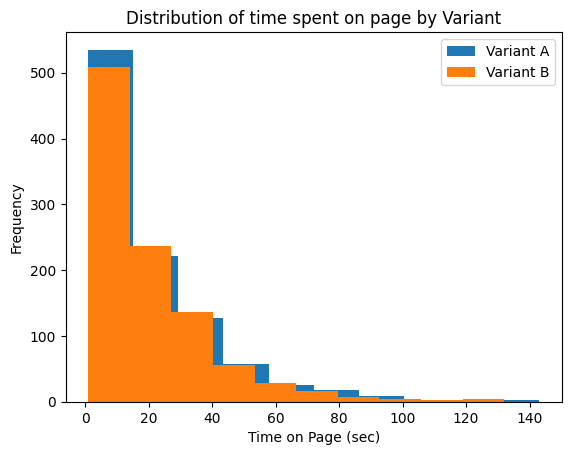

In [55]:
plt.hist(variant_a["Time on Page (sec)"], label="Variant A")
plt.hist(variant_b["Time on Page (sec)"], label="Variant B")
plt.legend()
plt.xlabel("Time on Page (sec)")
plt.ylabel("Frequency")
plt.title("Distribution of time spent on page by Variant")
plt.show()

In [56]:
levene_statistic, p_value_levene = stats.levene(variant_a["Time on Page (sec)"], variant_b["Time on Page (sec)"])

if p_value_levene < 0.05:
    print("Unequal variances detected. Using Welch's t-test.")
else:
    print("Equal variances assumed. Using ttest_ind.")

Equal variances assumed. Using ttest_ind.


In [57]:
t_statistic, p_value = stats.ttest_ind(variant_a_filtered["Time on Page (sec)"], variant_b_filtered["Time on Page (sec)"], equal_var=True)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis. Statistically significant difference in CTR between variants.")
else:
    print("Fail to reject null hypothesis. No statistically significant difference in CTR.")


t-statistic: 0.41279131309731887
p-value: 0.679804075145372
Fail to reject null hypothesis. No statistically significant difference in CTR.
